In [1]:
from transformers import BertForQuestionAnswering, BertTokenizer
import torch

In [2]:
model_name='bert-large-uncased-whole-word-masking-finetuned-squad'

In [3]:
model = BertForQuestionAnswering.from_pretrained(model_name)

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
tokenizer = BertTokenizer.from_pretrained(model_name)

In [5]:
# example question and text containing the answer
question = "When was the first dvd released?"
answer_document = "The first DVD (Digital Versatile Disc) was released on March 24, 1997. It was a movie titled 'Twister' and was released in Japan. DVDs quickly gained popularity as a replacement for VHS tapes and became a common format for storing and distributing digital video and data."

In [6]:
encoding = tokenizer.encode_plus(text=question, text_pair=answer_document)

In [7]:
print(encoding)

{'input_ids': [101, 2043, 2001, 1996, 2034, 4966, 2207, 1029, 102, 1996, 2034, 4966, 1006, 3617, 22979, 5860, 1007, 2001, 2207, 2006, 2233, 2484, 1010, 2722, 1012, 2009, 2001, 1037, 3185, 4159, 1005, 9792, 2121, 1005, 1998, 2001, 2207, 1999, 2900, 1012, 22477, 2855, 4227, 6217, 2004, 1037, 6110, 2005, 17550, 13324, 1998, 2150, 1037, 2691, 4289, 2005, 23977, 1998, 20083, 3617, 2678, 1998, 2951, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [8]:
inputs = encoding['input_ids']
sentence_embedding = encoding['token_type_ids']
tokens = tokenizer.convert_ids_to_tokens(inputs)

In [9]:
tokenizer.decode(101)

'[CLS]'

In [10]:
tokenizer.decode(102)

'[SEP]'

In [11]:
output = model(input_ids = torch.tensor([inputs]), token_type_ids = torch.tensor([sentence_embedding]))

Model output


In [12]:
start_index = torch.argmax(output.start_logits)
end_index = torch.argmax(output.end_logits)

print(start_index)
print(end_index)

tensor(20)
tensor(23)


In [13]:
answer = ' '.join(tokens[start_index:end_index+1])
print(answer)

march 24 , 1997


In [14]:
import matplotlib as plt
import seaborn as sns

In [15]:
s_scores = output.start_logits.detach().numpy().flatten()
e_scores = output.end_logits.detach().numpy().flatten()

In [16]:
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))

C:\Users\Filip\AppData\Local\Temp\ipykernel_29148\2545822322.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


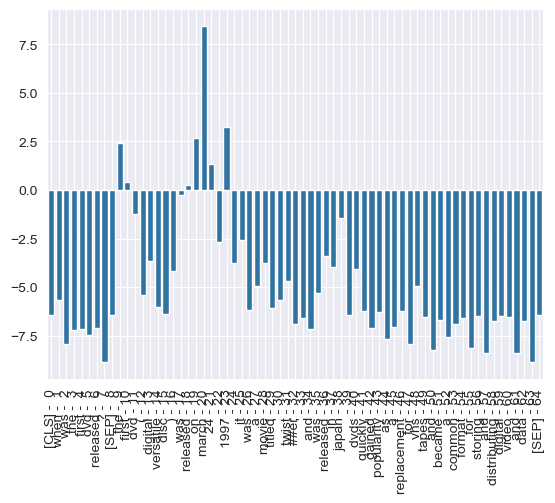

In [17]:
ax = sns.barplot(x=token_labels, y=s_scores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)

C:\Users\Filip\AppData\Local\Temp\ipykernel_29148\2043488493.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


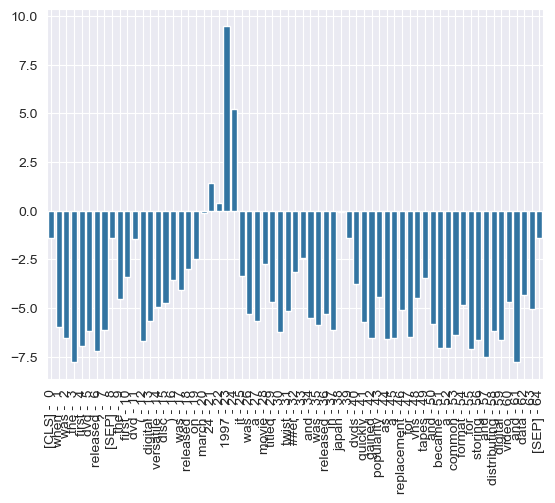

In [18]:
ax = sns.barplot(x=token_labels, y=e_scores)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
ax.grid(True)

Question Answering

In [19]:
sunset_motors_context = "Sunset Motors is a renowned automobile dealership that has been a cornerstone of the automotive industry since its establishment in 1978. Located in the picturesque town of Crestwood, nestled in the heart of California's scenic Central Valley, Sunset Motors has built a reputation for excellence, reliability, and customer satisfaction over the past four decades. Founded by visionary entrepreneur Robert Anderson, Sunset Motors began as a humble, family-owned business with a small lot of used cars. However, under Anderson's leadership and commitment to quality, it quickly evolved into a thriving dealership offering a wide range of vehicles from various manufacturers. Today, the dealership spans over 10 acres, showcasing a vast inventory of new and pre-owned cars, trucks, SUVs, and luxury vehicles. One of Sunset Motors' standout features is its dedication to sustainability. In 2010, the dealership made a landmark decision to incorporate environmentally friendly practices, including solar panels to power the facility, energy-efficient lighting, and a comprehensive recycling program. This commitment to eco-consciousness has earned Sunset Motors recognition as an industry leader in sustainable automotive retail. Sunset Motors proudly offers a diverse range of vehicles, including popular brands like Ford, Toyota, Honda, Chevrolet, and BMW, catering to a wide spectrum of tastes and preferences. In addition to its outstanding vehicle selection, Sunset Motors offers flexible financing options, allowing customers to secure affordable loans and leases with competitive interest rates."
print(sunset_motors_context)

Sunset Motors is a renowned automobile dealership that has been a cornerstone of the automotive industry since its establishment in 1978. Located in the picturesque town of Crestwood, nestled in the heart of California's scenic Central Valley, Sunset Motors has built a reputation for excellence, reliability, and customer satisfaction over the past four decades. Founded by visionary entrepreneur Robert Anderson, Sunset Motors began as a humble, family-owned business with a small lot of used cars. However, under Anderson's leadership and commitment to quality, it quickly evolved into a thriving dealership offering a wide range of vehicles from various manufacturers. Today, the dealership spans over 10 acres, showcasing a vast inventory of new and pre-owned cars, trucks, SUVs, and luxury vehicles. One of Sunset Motors' standout features is its dedication to sustainability. In 2010, the dealership made a landmark decision to incorporate environmentally friendly practices, including solar p

In [20]:
def faq_bot(question):
    context = sunset_motors_context
    input_ids = tokenizer.encode(question, context)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    sep_idx = input_ids.index(tokenizer.sep_token_id)
    num_seg_a = sep_idx+1
    num_seg_b = len(input_ids) - num_seg_a
    segment_ids = [0]*num_seg_a + [1]*num_seg_b
    output = model(torch.tensor([input_ids]), token_type_ids = torch.tensor([segment_ids]))
    answer_start = torch.argmax(output.start_logits)
    answer_end = torch.argmax(output.end_logits)
    if answer_end >= answer_start:
        answer = ' '.join(tokens[answer_start:answer_end+1])
    else:
        print("I don't know how to answer this question, can you ask another one?")
    corrected_answer = ''
    for word in answer.split():
        if word[0:2] == '##':
            corrected_answer += word[2:]
        else:
            corrected_answer += ' ' + word
    return corrected_answer

In [21]:
faq_bot("Where is the dealership located?")

' crestwood'

In [22]:
faq_bot("what make of cars are available?")

' ford , toyota , honda , chevrolet , and bmw'

In [23]:
faq_bot("how large is the dealership?")

' 10 acres'

In [24]:
from transformers import RobertaTokenizer, RobertaModel
model_name = "roberta-base"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaModel.from_pretrained(model_name)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
from transformers import  DistilBertTokenizer, DistilBertModel
model_name = "distilbert-base-uncased"
tokenizer =  DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertModel.from_pretrained(model_name)